In [253]:
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf


In [254]:
# plt.rcParams["figure.figsize"] = (10,10)

In [255]:
path = os.getcwd()

In [256]:
def readPickle(datapath):
    objects = []
    with (open(datapath, "rb")) as openfile:
        while True:
            try:
                objects.append(pickle.load(openfile))
            except EOFError:
                break
    return objects

In [757]:
alg ='blah'

relPath = "../../results/"+alg+"/agentList.pkl"
datapath = os.path.join(path, relPath)
with open(datapath, 'rb') as f:
    agentList = pickle.load(f)
    
relPath = "../../results/"+alg+"/totalReturns.pkl"   
datapath = os.path.join(path, relPath)
objects = readPickle(datapath)
totalReturns = []
for obj in objects:
    totalReturns = totalReturns + obj
    
relPath = "../../results/"+alg+"/loss.pkl"   
datapath = os.path.join(path, relPath)
objects = readPickle(datapath)
loss = []
for obj in objects:
    loss = loss + obj

relPath = "../../results/"+alg+"/volume.pkl"   
datapath = os.path.join(path, relPath)
volume = readPickle(datapath)

relPath = "../../results/"+alg+"/congested.pkl"   
datapath = os.path.join(path, relPath)
congested = readPickle(datapath)
relPath = "../../results/"+alg+"/top 5 percent loading.pkl"   
datapath = os.path.join(path, relPath)
percent5 = readPickle(datapath)
relPath = "../../results/"+alg+"/top 2.5 percent loading.pkl"   
datapath = os.path.join(path, relPath)
percent2_5 = readPickle(datapath)


In [758]:
num_iterations = len(loss)
eval_interval = int(len(loss)/len(totalReturns))
ret_steps = range(1, num_iterations + 1, eval_interval)
loss_steps = range(1, num_iterations + 1)

In [759]:
agentList

['k29n8h140_100_nsPVErsatzeinsp',
 'k29n8h133_229_nsPVErsatzeinsp',
 'k33n10h198_142_nsPVErsatzeinsp',
 'k33n10h195_94_nsPVErsatzeinsp',
 'k33n10h174_48_nsPVErsatzeinsp',
 'k69dea_262_wea',
 'k79dea_267_wea',
 'k94dea_261_wea',
 'k113dea_252_wea',
 'k57dea_249_wea',
 'k74d_BatteryStorage',
 'k57d_BatteryStorage',
 'k79d_BatteryStorage',
 'k29d_BatteryStorage',
 'k94d_BatteryStorage',
 'k29n8h135_237_nsEmobErsatzLast.1',
 'k33n10h196_145_nsEmobErsatzLast.2',
 'k33n10h201_644_nsEmobErsatzLast.1',
 'k33n10h183_63_nsEmobErsatzLast.2',
 'k29n8h145_474_nsEmobErsatzLast.1',
 'k33n10h201_28_nsWPErsatzlast_flex',
 'k33n10h197_26_nsWPErsatzlast_flex',
 'k33n10h176_16_nsWPErsatzlast_flex',
 'k33n10h172_117_nsWPErsatzlast_flex',
 'k29n8h125_139_nsWPErsatzlast_flex',
 'k29n8b110_nsBetrieb_BusinessPeak_flex',
 'k74n1b0_nsBetrieb_Business Base_flex',
 'k29n8b104_nsBetrieb_Gastronomie_flex',
 'k33n10b115_nsBetrieb_produzierendes Gewerbe_flex',
 'k33n10b48_nsBetrieb_Business Base_flex']

In [529]:
n=50
totalReturns = totalReturns[:n]
loss = loss[:n]
num_iterations = n
eval_interval = 1
ret_steps = range(1, num_iterations+1, eval_interval)
loss_steps = range(1, num_iterations + 1)

In [300]:
relPath = "../../results/"+alg+"/totalReturns_maddpg.pkl" 
datapath = os.path.join(path, relPath)
objects = readPickle(datapath)
tr = []
for obj in objects:
    tr = tr + obj
tr = tr[:50]

# relPath = "../Results/MADDPG_1_month_comparison/medium update/totalReturns.pkl"   
# datapath = os.path.join(path, relPath)
# objects = readPickle(datapath)
# trm = []
# for obj in objects:
#     trm = trm + obj
# trm = trm[:150]

In [530]:
def returnPlot(num, agent):
    agent_returns = [ret[num] for ret in totalReturns]
#     ar = [ret[num] for ret in tr]
#     arm = [ret[num] for ret in trm]
#     plt.plot(ret_steps, ar, 'indigo')
#     plt.plot(ret_steps, arm, 'peru')
    plt.plot(ret_steps, agent_returns, 'plum')
    plt.xlabel("Step")
    plt.ylabel('Avg Return - {}'.format(agentList[num]))
#     plt.ylabel('Avg Return - {} agent'.format(agent))
#     plt.legend(['MADDPG', 'IQL'], loc='best')
    plt.xticks(range(0, num_iterations, 5))
    plt.locator_params(axis='y', nbins=5)
    plt.locator_params(axis='x', nbins=5)
#     relPath = "../../results/"+alg+"/"+agentList[num]+"_1day_comparison.pdf"
#     datapath = os.path.join(path, relPath)
#     plt.savefig(datapath)
    plt.show()
    plt.clf()

In [663]:
f=[]
for i in range(len(agentList)):
    agent_returns = [ret[i] for ret in totalReturns]
    f.extend([agent_returns[50], agentList[i]])
withoutFlex = [0.12665210000000002,
 0.1494865,
 0.13235249999999998,
 3197.03706075,
 3077.799747325,
 3322.6739986,
 -10.0,
 -40.10290528,
 -20.0,
 -0.8366579999999999,
 -0.8366579999999999,
 -0.851976,
 -34.44326654377334,
 -1.2890742623183775,
 -3.2801769609285003]

withFlex = [0.2645463,
 0.3094521,
 0.28627327,
 6899.647,
 6496.0396,
 7193.8755,
 -10.0,
 -20.0,
 -20.0,
 -2,
 -2,
 -2,
 -15.389102,
 -0.6050469,
 -1.3852942]
wo, wi = [], []
for i in range(15):
    if i%3==1:
        wo.append(withoutFlex[i]/abs(withoutFlex[i]))
        wi.append(round(withFlex[i]/abs(withoutFlex[i]), 2))

[0.2645463,
 'k29n8h140_100_nsPVErsatzeinsp',
 0.3094521,
 'k29n8h133_229_nsPVErsatzeinsp',
 0.285958,
 'k33n10h198_142_nsPVErsatzeinsp',
 0.3468656,
 'k33n10h195_94_nsPVErsatzeinsp',
 0.6373391,
 'k33n10h174_48_nsPVErsatzeinsp',
 1.0022826,
 'k29n8h156_146_nsPVErsatzeinsp',
 0.250205,
 'k29n8h131_179_nsPVErsatzeinsp',
 1.0665354,
 'k33n10h197_184_nsPVErsatzeinsp',
 0.2434951,
 'k29n8h144_168_nsPVErsatzeinsp',
 1.2022582,
 'k33n10h178_23_nsPVErsatzeinsp',
 6899.647,
 'k69dea_262_wea',
 6496.0396,
 'k79dea_267_wea',
 7193.8755,
 'k94dea_261_wea',
 11471.041,
 'k113dea_252_wea',
 12945.768,
 'k57dea_249_wea',
 13368.15,
 'k109dea_272_wea',
 28.878,
 'k74d_BatteryStorage',
 2690.86,
 'k57d_BatteryStorage',
 791.24,
 'k79d_BatteryStorage',
 92.872,
 'k29d_BatteryStorage',
 2312.56,
 'k94d_BatteryStorage',
 1433.02,
 'k113d_BatteryStorage',
 45.79,
 'k33d_BatteryStorage',
 1771.7,
 'k69d_BatteryStorage',
 1806.1,
 'k109d_BatteryStorage',
 -10.0,
 'k29n8h135_237_nsEmobErsatzLast.1',
 -20.0,


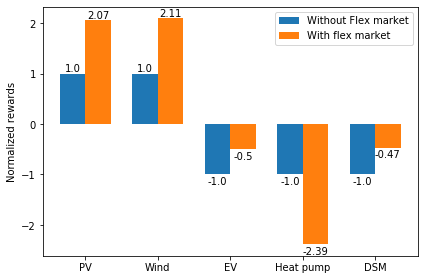

In [690]:
labels = ['PV', 'Wind', 'EV', 'Heat pump', 'DSM']
spot = wo
combined = wi

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, spot, width, label='Without Flex market')
rects2 = ax.bar(x + width/2, combined, width, label='With flex market')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Normalized rewards')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        if height>0:
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 0),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
        else:
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, -12),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')            


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

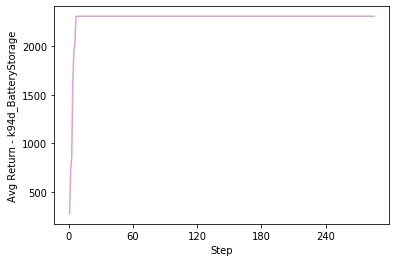

<Figure size 432x288 with 0 Axes>

In [654]:
# returnPlot(0, "PV")
# returnPlot(5, "Wind")
# returnPlot(10, "Battery")
# returnPlot(15, "EV")
# returnPlot(20, "HP")
# returnPlot(25, "DSM")
# for i in range(60):
#     returnPlot(i, i)
returnPlot(20, "Battery")

In [496]:
# returnPlot(0, "PV")
# returnPlot(1, "PV")
# returnPlot(2, "PV")
# returnPlot(3, "Wind")
# returnPlot(4, "Wind")
# returnPlot(5, "Wind")
# returnPlot(6, "Battery")
# returnPlot(7, "Battery")
# returnPlot(8, "Battery")
# returnPlot(9, "EV")
# returnPlot(10, "EV")
# returnPlot(11, "EV")
# returnPlot(12, "HP")
# returnPlot(13, "HP")
# returnPlot(14, "HP")
# returnPlot(15, "DSM")
# returnPlot(16, "DSM")
# returnPlot(17, "DSM")

285

In [630]:
relPath = "../../results/"+alg+"/volume_base.pkl"   
datapath = os.path.join(path, relPath)
volume_base = readPickle(datapath)
# relPath = "../../results/"+alg+"/volume_prev.pkl"   
# datapath = os.path.join(path, relPath)
# volume_prev = readPickle(datapath)

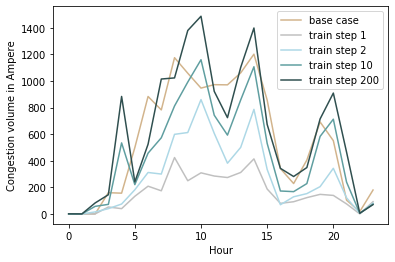

In [526]:
plt.plot(range(24), volume_base[363][362*24:363*24], 'tan')
plt.plot(range(24), volume[0], 'silver')
plt.plot(range(24), volume[2], 'lightblue')
plt.plot(range(24), volume[3], 'cadetblue')
plt.plot(range(24), volume[10], 'darkslategrey')
plt.xlabel("Hour")
plt.ylabel('Congestion volume in Ampere')
plt.legend(['base case', 'train step 1', 'train step 2', 'train step 10', 'train step 200'], loc='upper right')
relPath = "../../results/"+alg+"/Increasing congestion 1day.pdf"
datapath = os.path.join(path, relPath)
plt.savefig(datapath)
plt.show()

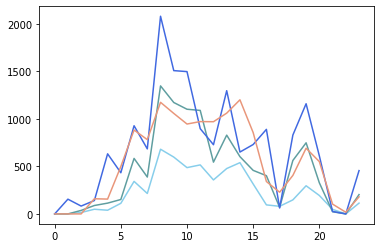

In [513]:
plt.plot(range(24), volume_prev[0], 'skyblue')
plt.plot(range(24), volume_prev[2], 'cadetblue')
# plt.plot(range(24), volume_prev[3], 'steelblue')
plt.plot(range(24), volume_prev[10], 'royalblue')
plt.plot(range(24), volume_base[363][362*24:363*24], 'darksalmon')

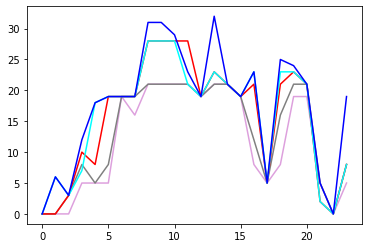

In [406]:
plt.plot(range(24), congested[0], 'plum')
plt.plot(range(24), congested[1], 'grey')
plt.plot(range(24), congested[2], 'red')
plt.plot(range(24), congested[3], 'cyan')
plt.plot(range(24), congested[80], 'blue')

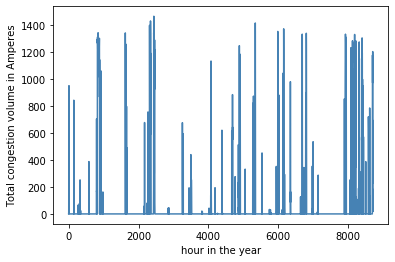

In [723]:
plt.plot(range(24*363), volume_base[364], 'steelblue')
plt.xlabel('hour in the year')
plt.ylabel("Total congestion volume in Amperes")
relPath = "../../results/"+alg+"/basevolume.pdf"
datapath = os.path.join(path, relPath)
plt.savefig(datapath)

Text(0, 0.5, 'Total congestion volume in Amperes')

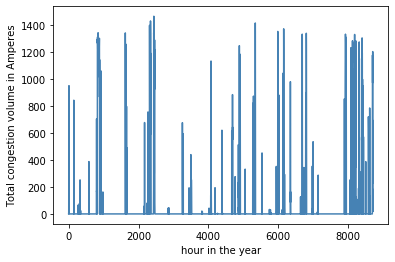

In [722]:
plt.plot(range(24*363), volume_base[364], 'steelblue')
plt.xlabel('hour in the year')
plt.ylabel("Total congestion volume in Amperes")

In [270]:
# plt.plot(loss_steps, loss)
# plt.show()

In [773]:
relPath = "../../results/"+alg+"/BatterySOC.pkl"   
datapath = os.path.join(path, relPath)
batterySOC = readPickle(datapath)

In [763]:
relPath = "../../results/"+alg+"/Actions.pkl"   
datapath = os.path.join(path, relPath)
objects = readPickle(datapath)
Actions = []
for obj in objects:
    Actions = Actions + list(obj)

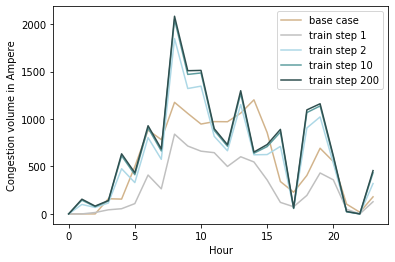

In [762]:
plt.plot(range(24), volume_base[363][362*24:363*24], 'tan')
plt.plot(range(24), volume[0], 'silver')
plt.plot(range(24), volume[2], 'lightblue')
plt.plot(range(24), volume[3], 'cadetblue')
plt.plot(range(24), volume[10], 'darkslategrey')
plt.xlabel("Hour")
plt.ylabel('Congestion volume in Ampere')
plt.legend(['base case', 'train step 1', 'train step 2', 'train step 10', 'train step 200'], loc='upper right')
# relPath = "../../results/"+alg+"/Increasing congestion 1day.pdf"
# datapath = os.path.join(path, relPath)
# plt.savefig(datapath)
plt.show()

[ 1. -1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1.  1.
 -1. -1. -1.  1.  1. -1.]
[ 1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1.  1. -1.  1.  1. -1. -1.  1.
 -1. -1.  1. -1. -1.  1.]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


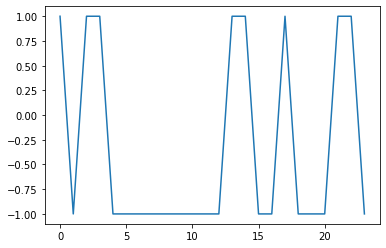

In [771]:
Act = [a for i, a in enumerate(Actions) if i%30==14]
print(Act[50][0][:24])
print(Act[50][0][24:48])
print(Act[50][0][48:])
plt.plot(range(24), Act[50][0][:24])

In [778]:
batterySOC[50][4]
# plt.plot(range(25), batterySOC[50][4]['after_spot'])

time  after_spot  before_flex  after_flex after_flex_remarks
0   8688        12.0         12.0        12.0         dispatched
1   8689        12.0         12.0        12.0     not dispatched
2   8690        10.0         12.0        10.0     not dispatched
3   8691        12.0         16.0        12.0     not dispatched
4   8692        14.0         20.0        16.0         dispatched
5   8693        12.0         20.0        16.0         dispatched
6   8694        10.0         20.0        16.0         dispatched
7   8695         8.0         16.0        12.0         dispatched
8   8696         6.0         12.0         8.0         dispatched
9   8697         4.0          8.0         4.0         dispatched
10  8698         4.0          6.0         4.0     cant discharge
11  8699         4.0          4.0         4.0     cant discharge
12  8700         4.0          6.0         6.0         dispatched
13  8701         4.0          4.0         4.0         dispatched
14  8702         6.0          8.0         8.0         dispatched
15  8703         8.0         12.0        12.0         dispatched
16  8704         6.0          8.0         8.0         dispatched
17  8705         4.0          4.0         6.0     not dispatched
18  8706         6.0          8.0        10.0         dispatched
19  8707         4.0          4.0         6.0         dispatched
20  8708         4.0          4.0         6.0     not dispatched
21  8709         4.0          6.0         8.0         dispatched
22  8710         6.0          6.0        10.0     not dispatched
23  8711         8.0          8.0        12.0     not dispatched
24  8712        12.0         12.0        12.0         dispatched

[ 1.  1. -1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1.
 -1. -1.  1. -1.  1. -1.]
[-1. -1.  1.  1. -1.  1. -1.  1.  1. -1. -1.  1.  1.  1.  1.  1.  1.  1.
  1.  1. -1. -1. -1.  1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


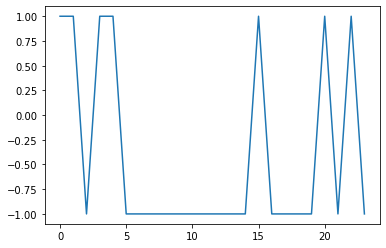

In [590]:
Act = [a for i, a in enumerate(Actions) if i%60==20]
print(Act[2500][0][:24])
print(Act[2500][0][24:48])
print(Act[2500][0][48:])
plt.plot(range(24), Act[2500][0][:24])

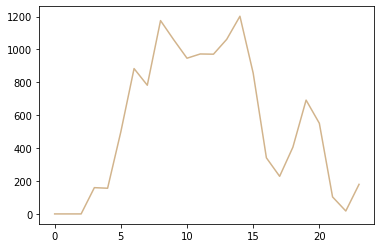

In [602]:
plt.plot(range(24), volume_base[363][362*24:363*24], 'tan')

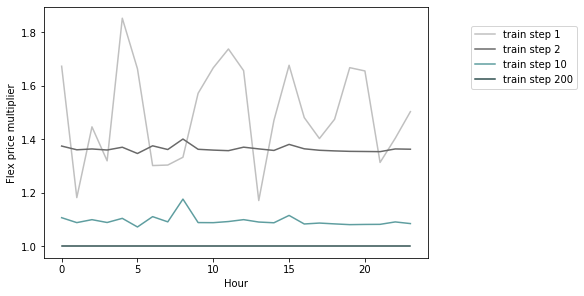

<Figure size 432x288 with 0 Axes>

In [651]:
for j in range(20,21):
    Act = [a for i, a in enumerate(Actions) if i%60==j]
    Act_c = [a for i, a in enumerate(Actions_collect) if i%60==j]
    fig, ax = plt.subplots(figsize=(8, 4), constrained_layout=True)
    ax.set_ylabel('Flex price multiplier')
    ax.set_xlabel('Hour')
    ax.plot(range(24), Act_c[0][0][48:], color='silver')
    ax.plot(range(24), Act[0][0][48:], color='dimgrey')
    ax.plot(range(24), Act[1][0][48:], color='cadetblue')
    ax.plot(range(24), Act[200][0][48:], color='darkslategrey')
    ax.legend(['train step 1', 'train step 2', 'train step 10', 'train step 200'], loc='center left', bbox_to_anchor=(1.1, 0.8))
    relPath = "../../results/"+alg+"/battery flex price competing.pdf"
    datapath = os.path.join(path, relPath)
    plt.savefig(datapath)
    plt.show()
    plt.clf()


In [560]:
def convergencePlot(num, agent):
    nAgents = 60
    period = 6
    eval_interval = 1
    Act = [a for i, a in enumerate(Actions) if i%nAgents==num]
#     ActCollectAndEval = [a for i, a in enumerate(Actions) if i%nAgents==num]
#     Act=[]
#     for i, a in enumerate(ActCollectAndEval):
#         if i%(period+eval_interval)>eval_interval-1:
#             Act.append(a)
    sbm, fbm, fpm = [], [], []
    for i in range(1, 40):
#     for i in range(1, len(Act)-1):
        val_sbm, val_fbm, val_fpm = 0.0, 0.0, 0.0
        for n in range(24):
            val_sbm += abs(Act[i+1][0][n] - Act[i][0][n])
        val_sbm /= 24
        sbm.append(val_sbm),
        
        for n in range(24, 48):
            val_fbm += abs(Act[i+1][0][n] - Act[i][0][n])
        val_fbm /= 24
        fbm.append(val_fbm)
        for n in range(48, 72):
            val_fpm += abs(Act[i+1][0][n] - Act[i][0][n])
        val_fpm /= 24
        fpm.append(val_fpm)

    plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Accent(np.linspace(0, 1, 3))))
    steps = range(len(sbm))
    plt.plot(steps, sbm)
    plt.plot(steps, fbm)
    plt.plot(steps, fpm)
    plt.xlabel("Step")
    plt.ylabel('{} agent'.format(agent))

    plt.legend(['sbm', 'fbm', 'fpm'], loc='upper right')
#     relPath = "../../results/"+alg+"/convergence_"+agent+"_1week.pdf"
#     datapath = os.path.join(path, relPath)
#     plt.savefig(datapath)
    plt.show()
    plt.clf()

In [561]:
len(agentList)

60

In [572]:
# convergencePlot(0, "PV")
# convergencePlot(1, "Wind")
# convergencePlot(2, "Battery")
# convergencePlot(3, "EV")
# convergencePlot(4, "HP")
# convergencePlot(5, "DSM")

In [158]:
# convergencePlot(0, "PV")
# convergencePlot(1, "PV")
# convergencePlot(2, "PV")
# convergencePlot(3, "Wind")
# convergencePlot(4, "Wind")
# convergencePlot(5, "Wind")
# convergencePlot(6, "Battery")
# convergencePlot(7, "Battery")
# convergencePlot(8, "Battery")
# convergencePlot(9, "EV")
# convergencePlot(10, "EV")
# convergencePlot(11, "EV")
# convergencePlot(12, "HP")
# convergencePlot(13, "HP")
# convergencePlot(14, "HP")
# convergencePlot(15, "DSM")
# convergencePlot(16, "DSM")
# convergencePlot(17, "DSM")
# convergencePlot(0, "PV")
# convergencePlot(1, "Wind")
# convergencePlot(2, "Battery")
# convergencePlot(3, "EV")
# convergencePlot(4, "HP")
# convergencePlot(5, "DSM")

In [221]:
relPath = "../../results/"+alg+"/loss_less.pkl"   
datapath = os.path.join(path, relPath)
objects = readPickle(datapath)
loss_less = []
for obj in objects:
    loss_less = loss_less + obj
relPath = "../../results/"+alg+"/loss_medium.pkl"   
datapath = os.path.join(path, relPath)
objects = readPickle(datapath)
loss_medium = []
for obj in objects:
    loss_medium = loss_medium + obj
relPath = "../../results/"+alg+"/loss_more.pkl"   
datapath = os.path.join(path, relPath)
objects = readPickle(datapath)
loss_more = []
for obj in objects:
    loss_more = loss_more + obj

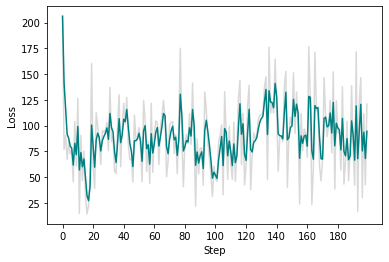

In [374]:
# path = os.getcwd()
# relPath = "../Results/MADDPG_1_day_6_agents/loss.pkl"
# datapath = os.path.join(path, relPath)
# objects = readPickle(datapath)
# l = []
# for obj in objects:
#     l = l + obj

l=loss[:200]
df = pd.DataFrame(l, columns=['Loss'])
# loss_less=loss_less[:150]
# loss_medium=loss_medium[:150]
# loss_more=loss_more[:150]
# df_less = pd.DataFrame(loss_less, columns=['Loss'])
# df_medium = pd.DataFrame(loss_medium, columns=['Loss'])
# df_more = pd.DataFrame(loss_more, columns=['Loss'])
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed
# df_less['MA'] = smooth(df_less['Loss'], 0.7)
# df_medium['MA'] = smooth(df_medium['Loss'], 0.7)
# df_more['MA'] = smooth(df_more['Loss'], 0.7)
# plt.plot(range(len(loss_less)), df_less['MA'],  'tab:orange')
# plt.plot(range(len(loss_less)), df_medium['MA'],  'tab:brown')
# plt.plot(range(len(loss_less)), df_more['MA'],  'tab:gray')
# plt.legend(['less update', 'medium update', 'more update'], loc='upper left')
df['MA'] = smooth(df['Loss'], 0.5)
plt.plot(range(len(l)), df['Loss'],  color='0.85')
plt.plot(range(len(l)), df['MA'],  'teal')


plt.xlabel("Step")
plt.ylabel('Loss')
plt.xticks(range(0, len(l), 20))
relPath = "../../results/"+alg+"/loss.pdf"
datapath = os.path.join(path, relPath)
plt.savefig(datapath)
plt.show()

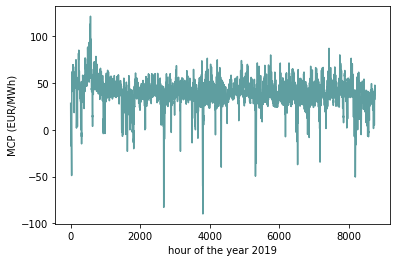

In [479]:
relPath = "../../inputs/Day-ahead Prices_201901010000-202001010000_neu.csv"
datapath = os.path.join(path, relPath)
mcp=pd.read_csv(datapath, sep=';', comment='#', header=0, skiprows=0, error_bad_lines=False)
plt.plot(range(8760), mcp['Day-ahead Price [EUR/MWh]'], color='cadetblue')
plt.xlabel("hour of the year 2019")
plt.ylabel('MCP (EUR/MWh)')
relPath = "../../results/MCP.pdf"
datapath = os.path.join(path, relPath)
plt.savefig(datapath)

In [729]:
mcp.loc[8688:8711]

MTU (CET)        Unnamed: 1  Day-ahead Price [EUR/MWh]
8688  29.12.2019 00:00  29.12.2019 01:00                      30.60
8689  29.12.2019 01:00  29.12.2019 02:00                      28.10
8690  29.12.2019 02:00  29.12.2019 03:00                      26.92
8691  29.12.2019 03:00  29.12.2019 04:00                      22.85
8692  29.12.2019 04:00  29.12.2019 05:00                      20.97
8693  29.12.2019 05:00  29.12.2019 06:00                      21.31
8694  29.12.2019 06:00  29.12.2019 07:00                      22.72
8695  29.12.2019 07:00  29.12.2019 08:00                      25.10
8696  29.12.2019 08:00  29.12.2019 09:00                      27.52
8697  29.12.2019 09:00  29.12.2019 10:00                      30.04
8698  29.12.2019 10:00  29.12.2019 11:00                      30.60
8699  29.12.2019 11:00  29.12.2019 12:00                      30.93
8700  29.12.2019 12:00  29.12.2019 13:00                      32.03
8701  29.12.2019 13:00  29.12.2019 14:00                      30.61
8702  29.12.2019 14:00  29.12.2019 15:00                      30.80
8703  29.12.2019 15:00  29.12.2019 16:00                      32.86
8704  29.12.2019 16:00  29.12.2019 17:00                      33.97
8705  29.12.2019 17:00  29.12.2019 18:00                      39.53
8706  29.12.2019 18:00  29.12.2019 19:00                      41.16
8707  29.12.2019 19:00  29.12.2019 20:00                      39.60
8708  29.12.2019 20:00  29.12.2019 21:00                      38.14
8709  29.12.2019 21:00  29.12.2019 22:00                      32.00
8710  29.12.2019 22:00  29.12.2019 23:00                      30.11
8711  29.12.2019 23:00  30.12.2019 00:00                      25.52

In [ ]:
for j in range(20,21):
    Act = [a for i, a in enumerate(Actions) if i%60==j]
    Act_c = [a for i, a in enumerate(Actions_collect) if i%60==j]
    fig, ax = plt.subplots(figsize=(8, 4), constrained_layout=True)
    ax.set_ylabel('Flex price multiplier')
    ax.set_xlabel('Hour')
    ax.plot(range(24), Act_c[0][0][48:], color='silver')
    ax.plot(range(24), Act[0][0][48:], color='dimgrey')
    ax.plot(range(24), Act[1][0][48:], color='cadetblue')
    ax.plot(range(24), Act[200][0][48:], color='darkslategrey')
    ax.legend(['train step 1', 'train step 2', 'train step 10', 'train step 200'], loc='center left', bbox_to_anchor=(1.1, 0.8))
    relPath = "../../results/"+alg+"/battery flex price competing.pdf"
    datapath = os.path.join(path, relPath)
    plt.savefig(datapath)
    plt.show()
    plt.clf()

In [733]:
Act = [a for i, a in enumerate(Actions) if i%52==16]

In [734]:
Act

[array([[ 0.60630596,  0.6186533 ,  0.6198802 ,  0.6164041 ,  0.6172822 ,
          0.6113307 ,  0.6030789 ,  0.61862344,  0.61036986,  0.61360466,
          0.6089744 ,  0.6050025 ,  0.6050346 ,  0.57580024,  0.6174868 ,
          0.62403303,  0.59531   ,  0.5938247 ,  0.61073905,  0.60457414,
          0.6084431 ,  0.6114803 ,  0.60301155,  0.6265618 , -0.59950167,
         -0.628271  , -0.6054838 , -0.6150787 , -0.59539145, -0.42946482,
         -0.62249357, -0.6105187 , -0.6047581 , -0.6111466 , -0.62447536,
         -0.6039312 , -0.6151945 , -0.6101818 , -0.63610905, -0.59098184,
         -0.6153856 , -0.5883412 , -0.62045693, -0.6159184 , -0.6046228 ,
         -0.601037  , -0.5952819 , -0.61524516,  1.6012942 ,  1.6237764 ,
          1.6205131 ,  1.6055954 ,  1.6086146 ,  1.606338  ,  1.6065695 ,
          1.6307095 ,  1.602701  ,  1.5898104 ,  1.6312373 ,  1.5974975 ,
          1.6192726 ,  1.6195955 ,  1.6176965 ,  1.6063929 ,  1.6062367 ,
          1.6046282 ,  1.617605  ,  1.

[1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[-1. -1. -1. -1. -1.  0. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1.]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


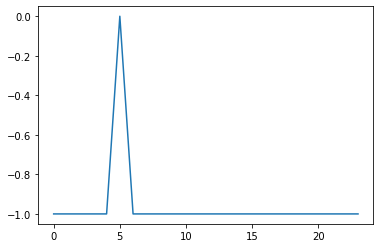

In [756]:
Act = [a for i, a in enumerate(Actions) if i%52==22]
print(Act[2500][0][:24])
print(Act[2500][0][24:48])
print(Act[2500][0][48:])
plt.plot(range(24), Act[2500][0][24:48])

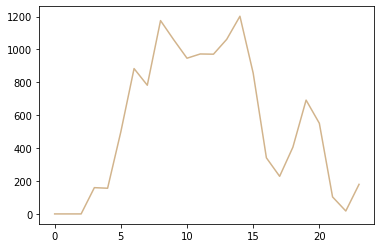

In [737]:
plt.plot(range(24), volume_base[363][362*24:363*24], 'tan')